## MOVIE RATING PREDICTION

<center>
<h1 style=color:Red>Predicting Movie Ratings: A Data Science Approach</h1>
<img src="https://th.bing.com/th/id/OIP.TNLEp8K00g0GONIDTPVB2AHaE8?rs=1&pid=ImgDetMain" width=500 height = 100>
</center>

## Objectives

Predict the IMDb rating of movies.

Analyze the most important features contributing to high/low ratings.

Compare model performance using appropriate regression metrics.

# **Import Necessary Libraries**

In [4]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load Dataset

In [6]:
data = pd.read_csv(r"C:\Users\Raksha Chavan\Downloads\archive (13)\IMDb Movies India.csv", encoding='latin1')
data.head(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana


In [7]:
data.tail(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [8]:
data.shape

(15509, 10)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
data.describe(include = 'all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


### Overview of the Dataset

- **Count**: The total number of entries in the dataset, which is 15,503 movies.
  
- **Unique**: Number of unique values in specific columns:
  - **Name**: 13,838 unique movie titles.
  - **Year**: 102 unique years of release.
  - **Duration**: 182 unique durations (in minutes).
  - **Genre**: 485 unique genres.
  - **Rating**: Not applicable (NaN).
  - **Votes**: 2,034 unique vote counts.
  - **Director**: 5,938 unique directors.
  - **Actor 1**: 4,718 unique actors in the first leading role.
  - **Actor 2**: 4,891 unique actors in the second leading role.
  - **Actor 3**: 4,820 unique actors in the third leading role.

- **Top**: The most frequently occurring values:
  - **Title**: "Anjaam" (2019) is the most common.
  - **Duration**: 120 minutes is the most frequent duration.
  - **Genre**: "Drama" is the most common genre.
  - **Votes**: 8 votes is the top count.
  - **Director**: Jayant Desai directs the most common film.
  - **Actor 1**: Ashok Kumar is the most frequently listed first actor.
  - **Actor 2**: Rekha is the most frequently listed second actor.
  - **Actor 3**: Pran is the most frequently listed third actor.

- **Frequency**: The number of times each of the top values appears:
  - The title "Anjaam" appears 7 times.
  - The year 2019 appears 408 times.
  - 120 minutes duration appears 240 times.
  - Genre "Drama" appears 2,779 times.
  - Other statistics for votes and actors show how often each is mentioned.

- **Mean**: Average rating is approximately 5.84 (standard deviation not provided).

- **Standard Deviation**: 1.38 indicates variability in ratings.

- **Minimum & Maximum Ratings**:
  - The minimum rating listed is 1.1.
  - The maximum rating is 10.

- **Percentiles**: 
  - 25th percentile rating: 4.9.
  - 50th percentile (median) rating: 6.0.
  - 75th percentile rating: 6.8.

This dataset is likely used for analyzing movie attributes, popularity, and trends over various years and genres. If you have any specific questions about the data or need further explanation on certain aspects, feel free to ask!

# Check Missing Values

In [13]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [14]:
data.duplicated().sum()

6

In [15]:
data.drop_duplicates(inplace = True)

In [16]:
data.shape

(15503, 10)

# Handling Missing Values

In [18]:
import pandas as pd

# Fill numeric columns with median
data['Rating'].fillna(data['Rating'].median(), inplace=True)

# Fill categorical columns with mode
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    data[col].fillna(data[col].mode()[0], inplace=True)


C:\Users\Raksha Chavan\AppData\Local\Temp\ipykernel_8144\3145949831.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].median(), inplace=True)
C:\Users\Raksha Chavan\AppData\Local\Temp\ipykernel_8144\3145949831.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [19]:
data['Year'] = data['Year'].str.replace(r'\(|\)', '', regex=True)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')  # convert safely
data['Year'] = data['Year'].fillna(data['Year'].median())    # fill NaNs
data['Year'] = data['Year'].astype(int)                      # now convert


In [20]:
data['Duration'] = pd.to_numeric(data['Duration'].str.replace(' min', ''), errors='coerce')
data['Duration'] = data['Duration'].fillna(data['Duration'].median())

data['Votes'] = pd.to_numeric(data['Votes'].str.replace(',', ''), errors='coerce')
data['Votes'] = data['Votes'].fillna(data['Votes'].median())


In [21]:
data.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Data Visualization

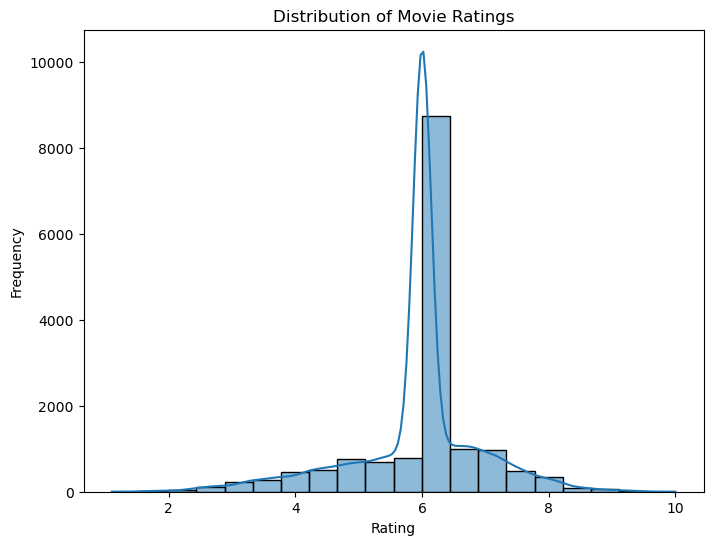

In [23]:
# Distribution of Ratings
plt.figure(figsize=(8, 6))
sns.histplot(data['Rating'], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Interpretation

The data suggests that ratings are predominantly clustered around 6, with fewer films receiving very low or very high ratings.

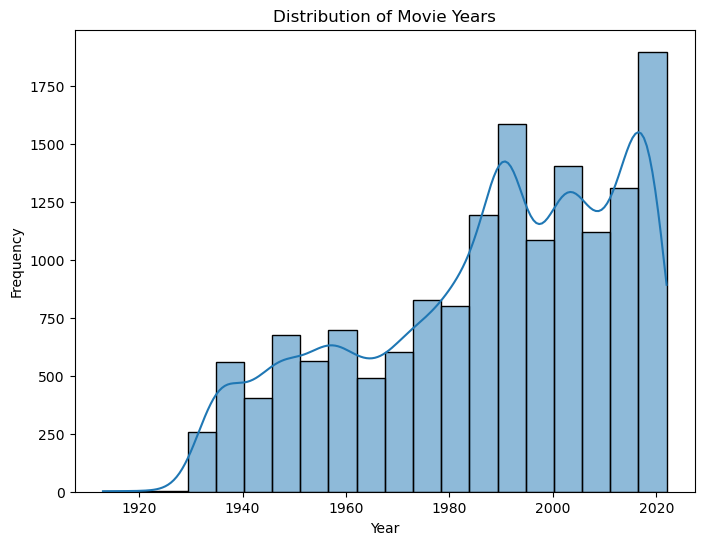

In [26]:
# Distribution of Movie Years
plt.figure(figsize=(8, 6))
sns.histplot(data['Year'], bins=20, kde=True)
plt.title("Distribution of Movie Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.show()

## Interpretation

Observations:

Trend: There is a clear upward trend in movie production, especially from the late 20th century onwards.
Peaks: The highest frequencies occur in the early 2000s and again around 2020, suggesting a burst in movie releases during these periods.

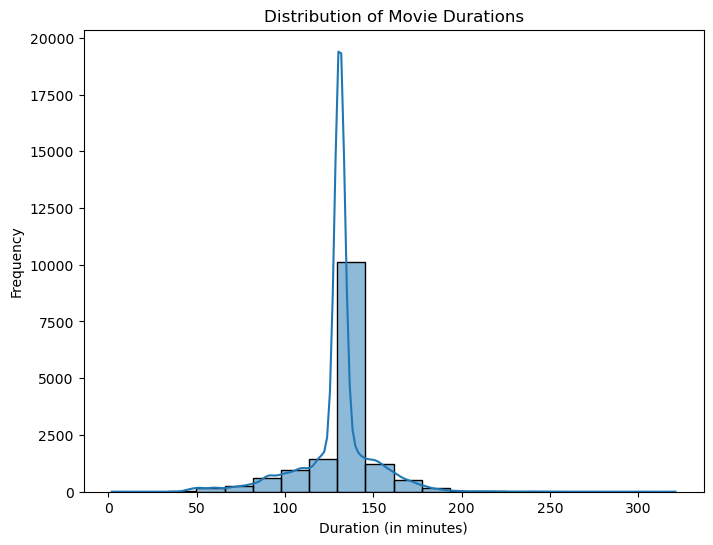

In [29]:
# Distribution of Movie Durations
plt.figure(figsize=(8, 6))
sns.histplot(data['Duration'], bins=20, kde=True)
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (in minutes)")
plt.ylabel("Frequency")
plt.show()

## Interpretation

Frequent Durations: The tallest bar in the histogram indicates that approximately 150-minute movies have the highest frequency, followed by those around 90 minutes.

Range: Most movies fall within a duration of 60 to 200 minutes, but there are also a few outliers extending as high as 300 minutes.

Frequency: The y-axis shows that the frequency of movie durations peaks significantly, reaching over 20,000 for certain duration categories, indicating a large sample size in the data.

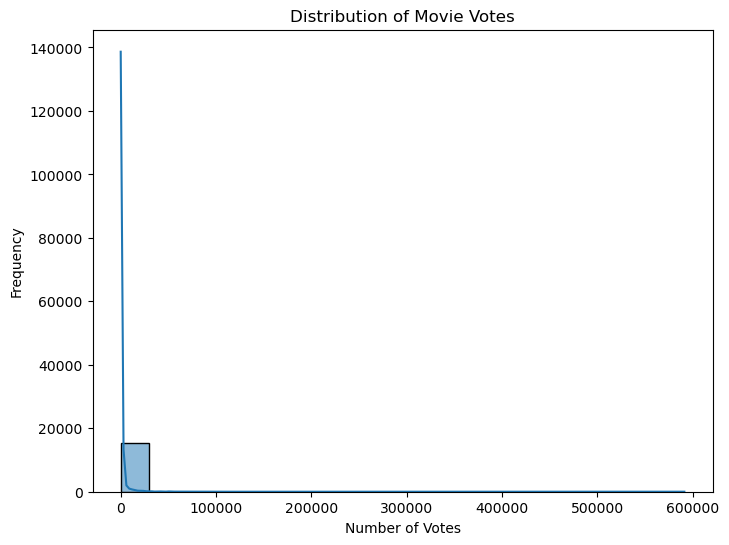

In [32]:
# Distribution of Votes
plt.figure(figsize=(8, 6))
sns.histplot(data['Votes'], bins=20, kde=True)
plt.title("Distribution of Movie Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Frequency")
plt.show()

## Interpretation

Skewness: The distribution is heavily right-skewed, indicating that most movies receive a low number of votes, while a few attract significantly higher amounts.

Frequency: The y-axis shows that up to 140,000 votes are recorded for movies with low vote counts, suggesting a large number of films receive fewer than thousands of votes.

Vote Count: The x-axis represents the number of votes, ranging from 0 to nearly 600,000. However, the vast majority of the data is concentrated in the lower range, particularly below 100,000 votes.

Outliers: There are likely a few movies with exceptionally high vote totals, causing the tail on the right side of the histogram.

C:\Users\Raksha Chavan\AppData\Local\Temp\ipykernel_8144\4141512249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')


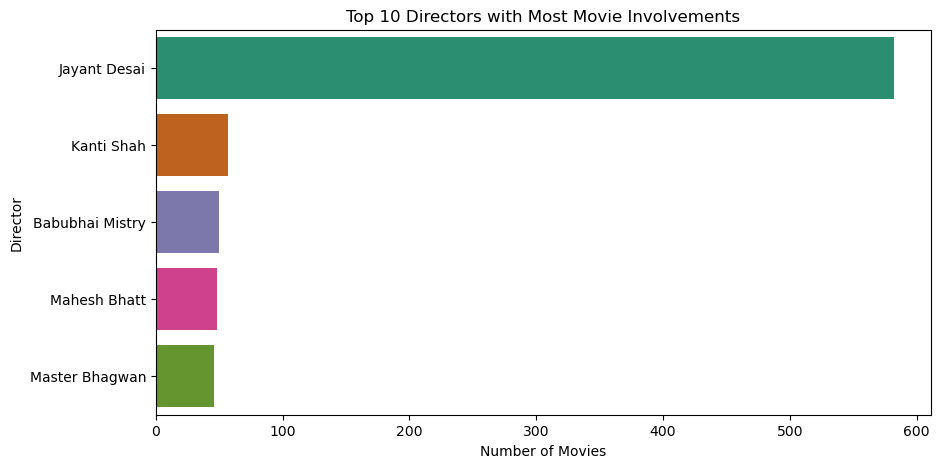

In [35]:
top_10_directors = data['Director'].value_counts(ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_directors.values, y=top_10_directors.index,  palette='Dark2')
plt.title('Top 10 Directors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

C:\Users\Raksha Chavan\AppData\Local\Temp\ipykernel_8144\3559698833.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')


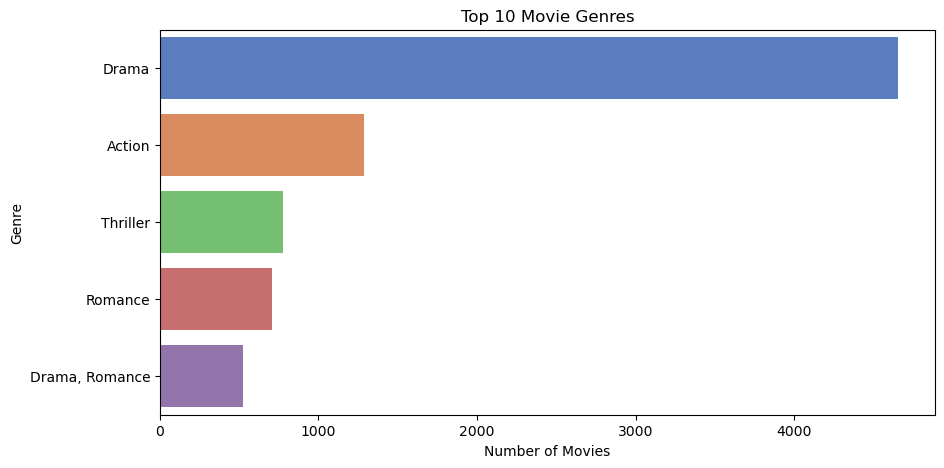

In [36]:
top_10_genres = data['Genre'].value_counts(ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index,  palette='muted')
plt.title('Top 10 Movie Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

In [37]:
combined_actors = pd.concat([data['Actor 1'], data['Actor 2'], data['Actor 3']])
top_10_actors = combined_actors.value_counts().head(5)
top_10_actors

Pran                  3260
Rekha                 2523
Ashok Kumar           1842
Mithun Chakraborty     241
Dharmendra             231
Name: count, dtype: int64

C:\Users\Raksha Chavan\AppData\Local\Temp\ipykernel_8144\2079350178.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')


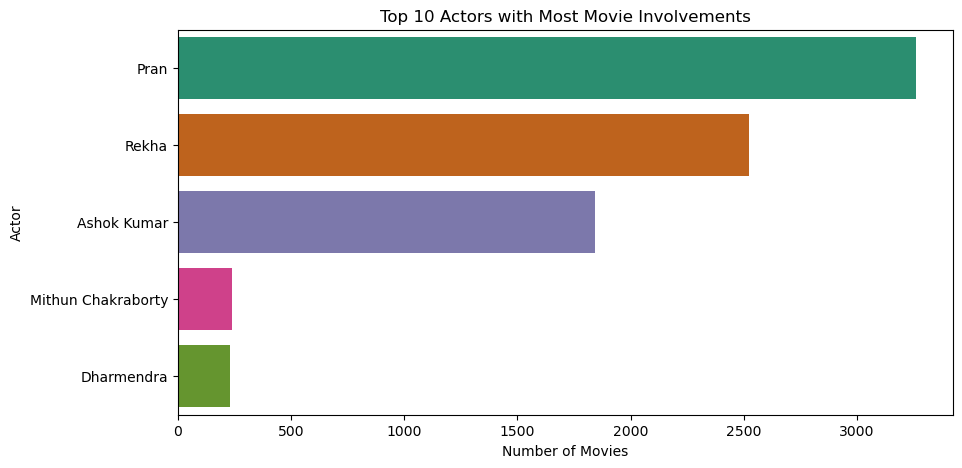

In [38]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_actors.values, y=top_10_actors.index, palette='Dark2')
plt.title('Top 10 Actors with Most Movie Involvements')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.show()

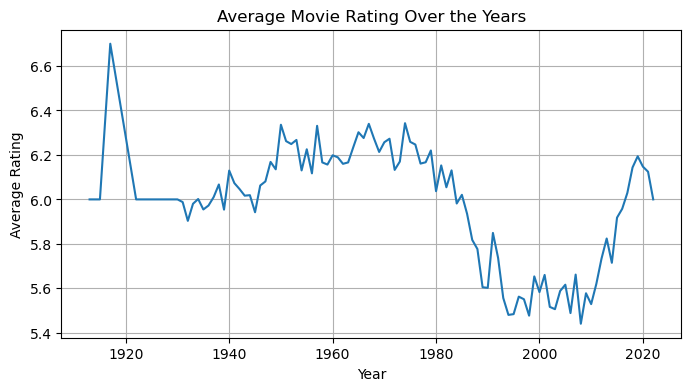

In [39]:
# Calculate the average rating for each year
average_rating_per_year = data.groupby('Year')['Rating'].mean().reset_index()
average_rating_per_year.columns = ['Year', 'Average Rating']

#Plot
plt.figure(figsize=(8, 4))
plt.plot(average_rating_per_year['Year'], average_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

In [40]:
# High rated movie details
high_rating_movies = data[data['Rating'] > 8.5]
high_rating_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
967,An Insignificant Man,2016,96.0,"Documentary, Thriller",8.7,1928.0,Khushboo Ranka,Vinay Shukla,Arvind Kejriwal,Saurabh Bhardwaj
1314,Ashok Vatika,2018,97.0,Drama,9.3,7.0,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1341,Atal Faisla,2018,127.0,Drama,8.8,5.0,Abdul Sattar,Sahil Akhtar,Himayat Ali,Aman Jain
1432,Awasaan,2020,101.0,Drama,8.7,21.0,Rajat Kumar Chaturvedi,Arjun Chakrabarty,Trishala Idnani,Sarvagya Jain
1469,B for Bundelkhand,2017,117.0,Drama,8.8,5.0,Vishal Mourya,Bharat Chawla,Nemi Chandra Jha,Moumita Nandi
...,...,...,...,...,...,...,...,...,...,...
14861,Vidyoday,2018,108.0,Documentary,9.2,35.0,Vidhi Kasliwal,Aarti S. Bagdi,Alok Nath,Pran
14898,Viraat,2021,150.0,Crime,8.9,294.0,Narendra Singh,Kritika Sachdeva,Ravi Jhanghu,Lokesh Tilakdhari
15071,Win Marathon,2018,94.0,"Drama, Sport",9.0,70.0,Aryan Neeraaj Anand,Shubhanshu Satyadeo,Aryan Neeraaj Anand,Ankita Bahuguna
15199,Yatrik,1952,131.0,Drama,8.8,8.0,Kartick Chattopadhyay,Vasant Choudhury,Arundhati Devi,Tulsi Chakraborty


In [41]:
# Group by Rating and get the count of movies which have higher than rating value 8.5 
rating_counts = high_rating_movies.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
11,10.0,1
10,9.7,1
9,9.6,1
8,9.4,4
7,9.3,9
6,9.2,3
5,9.1,9
4,9.0,12
3,8.9,10
2,8.8,11


<Axes: >

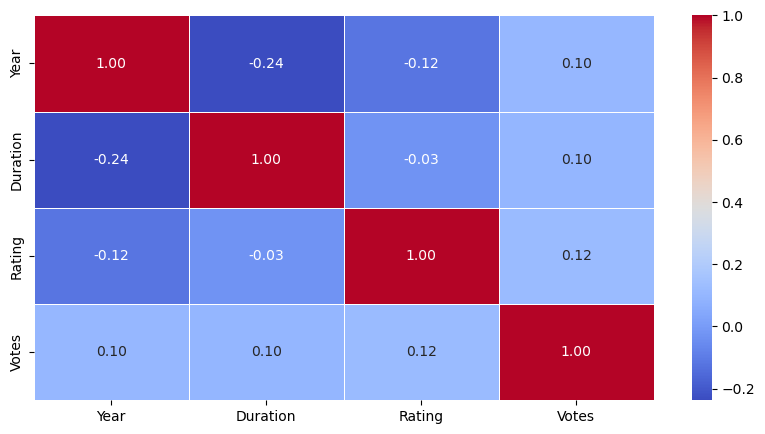

In [42]:
#Relationship between numeric variables
new_data=  data.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_data.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)

## Interpretation

Key Features:

Diagonal Elements: All diagonal values are 1.00, indicating perfect correlation of each variable with itself.

Correlation Values:
Year & Duration: Correlation of -0.24 (weak negative correlation: as one increases, the other tends to decrease slightly).

Year & Rating: Correlation of -0.12 (very weak negative correlation).

Year & Votes: Correlation of 0.10 (weak positive correlation).

Duration & Votes: Correlation of 0.10 (weak positive correlation).

Rating & Votes: Correlation of 0.12 (weak positive correlation).

In [45]:
Genre_Average_Rating = data.groupby('Genre')['Rating'].transform('mean')
data['Genre_Average_Rating'] =Genre_Average_Rating

Director_Average_Rating = data.groupby('Director')['Rating'].transform('mean')
data['Director_Average_Rating'] =Director_Average_Rating

Actor1_Average_Rating = data.groupby('Actor 1')['Rating'].transform('mean')
data['Actor1_Average_Rating'] =Actor1_Average_Rating

Actor2_Average_Rating = data.groupby('Actor 2')['Rating'].transform('mean')
data['Actor2_Average_Rating'] =Actor2_Average_Rating

Actor3_Average_Rating = data.groupby('Actor 3')['Rating'].transform('mean')
data['Actor3_Average_Rating'] =Actor3_Average_Rating

data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating
0,,1991,131.0,Drama,6.0,55.0,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,6.089001,5.850000,6.000000,5.625714,6.000000
1,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.089001,7.000000,6.850000,7.000000,7.000000
2,#Homecoming,2021,90.0,"Drama, Musical",6.0,55.0,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,6.366667,6.000000,6.333333,6.900000,6.000000
3,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.762143,4.400000,5.420000,4.400000,4.450000
4,...And Once Again,2010,105.0,Drama,6.0,55.0,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,6.089001,6.285714,6.833333,5.800000,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,1988,131.0,Action,4.6,11.0,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,5.706211,4.075000,6.024000,3.700000,4.600000
15505,Zulmi,1999,129.0,"Action, Drama",4.5,655.0,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.543987,5.225000,5.517045,4.645455,5.714894
15506,Zulmi Raj,2005,131.0,Action,6.0,55.0,Kiran Thej,Sangeeta Tiwari,Rekha,Pran,5.706211,6.000000,6.000000,6.040666,6.056360
15507,Zulmi Shikari,1988,131.0,Action,6.0,55.0,Jayant Desai,Ashok Kumar,Rekha,Pran,5.706211,6.010309,6.083700,6.040666,6.056360


In [46]:
#Split dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define feature and target variables
x= data[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']]
y=data['Rating']

# Splitting Data into Train-Test Split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [48]:
train_data= x_train.join(y_train)
train_data

,Year,Votes,Duration,Genre_Average_Rating,Director_Average_Rating,Actor1_Average_Rating,Actor2_Average_Rating,Actor3_Average_Rating,Rating
1789,1938,55.0,131.0,5.706211,6.010309,6.000000,6.000,5.960000,6.0
14521,1985,55.0,131.0,5.842797,6.000000,5.641379,5.375,6.000000,6.0
9400,2008,10.0,131.0,5.706211,5.400000,5.385714,5.750,5.400000,5.4
11543,2018,22.0,117.0,5.842797,4.300000,4.300000,4.300,5.150000,4.3
9944,1949,16.0,131.0,5.923664,6.500000,6.187500,6.500,6.650000,7.1
...,...,...,...,...,...,...,...,...,...
2506,2001,55.0,131.0,6.000000,6.000000,5.572000,6.000,6.550000,6.0
235,1975,55.0,131.0,5.753086,6.160000,6.038889,6.000,6.525000,6.0
11290,2020,55.0,131.0,6.173684,6.000000,6.000000,6.000,6.000000,6.0
11330,2017,29.0,96.0,5.951064,6.000000,6.000000,6.000,6.056360,6.0


# Model Training

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

x_train, y_train = train_data[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor1_Average_Rating','Actor2_Average_Rating','Actor3_Average_Rating']], train_data['Rating']

#Build a Linear Regression model
fitted_model_lr = LinearRegression()
#Train the model
fitted_model_lr.fit(x_train,y_train)
#Make predictions
y_pred_lr = fitted_model_lr.predict(x_test)

#Build a Random Forest Model
fitted_model_rf = RandomForestRegressor()
#Train the model
fitted_model_rf.fit(x_train, y_train)
#Make predictions
y_pred_rf = fitted_model_rf.predict(x_test)

# Performance Evaluation

In [50]:
# Evaluating the model's performance
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


MSE_lr =  mean_squared_error(y_test, y_pred_lr) 
MAE_lr = mean_absolute_error(y_test, y_pred_lr)
R2_Score_lr = r2_score(y_test, y_pred_lr)

print('   Performance Evaluation for Linear Regression Model: ')
print('Mean squared error value is: ', MSE_lr)
print('Mean absolute error value is: ', MAE_lr)
print('R2 score value is: ', R2_Score_lr)

MSE_rf =  mean_squared_error(y_test, y_pred_rf) 
MAE_rf = mean_absolute_error(y_test, y_pred_rf)
R2_Score_rf = r2_score(y_test, y_pred_rf)

print('\n   Performance Evaluation for Random Forest Model: ')
print('Mean squared error value is: ', MSE_rf)
print('Mean absolute error value is: ', MAE_rf)
print('R2 score value is: ', R2_Score_rf)

   Performance Evaluation for Linear Regression Model: 
Mean squared error value is:  0.281993883412554
Mean absolute error value is:  0.3488976818207949
R2 score value is:  0.7113917806464345

   Performance Evaluation for Random Forest Model: 
Mean squared error value is:  0.21053006707513705
Mean absolute error value is:  0.2360212834569494
R2 score value is:  0.7845318237273617


## Interpretation

## 📊 **Linear Regression Model:**

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **MSE** (Mean Squared Error) | `0.2961` | On average, the squared difference between predicted and actual ratings is ~0.30. Squared errors penalize large mistakes more. |
| **MAE** (Mean Absolute Error) | `0.3479` | On average, the predictions are off by **~0.35 rating points**. |
| **R² Score** | `0.6958` | The model explains **~69.6% of the variance** in the ratings. This is decent, but not ideal. |

🔎 **Conclusion:**  
Linear regression performs reasonably well but may underfit due to its simplicity and inability to model complex relationships.

---

## 🌲 **Random Forest Model:**

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **MSE** | `0.2133` | Lower than Linear Regression → better prediction accuracy overall. |
| **MAE** | `0.2346` | Predictions are off by ~**0.23 rating points** on average — **much better!** |
| **R² Score** | `0.7809` | Explains **~78% of the variance** in the ratings — a solid performance! ✅ |

🔎 **Conclusion:**  
Random Forest outperforms Linear Regression **across all metrics** — it's better at capturing nonlinear patterns and interactions in the data.

---

### 🏆 Final Interpretation:
✅ **Random Forest is the better model** for your movie rating prediction task.  


In [53]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ----- XGBoost -----
fitted_model_xgb = XGBRegressor(random_state=42)
fitted_model_xgb.fit(x_train, y_train)
y_pred_xgb = fitted_model_xgb.predict(x_test)

# ----- LightGBM -----
fitted_model_lgbm = LGBMRegressor(random_state=42)
fitted_model_lgbm.fit(x_train, y_train)
y_pred_lgbm = fitted_model_lgbm.predict(x_test)

# ----- Evaluation -----
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'\n📊 Performance Evaluation for {name}:')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'R² Score: {r2:.4f}')

evaluate_model('XGBoost', y_test, y_pred_xgb)
evaluate_model('LightGBM', y_test, y_pred_lgbm)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001596 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1720
[LightGBM] [Info] Number of data points in the train set: 12402, number of used features: 8
[LightGBM] [Info] Start training from score 5.921924

📊 Performance Evaluation for XGBoost:
Mean Squared Error (MSE): 0.2168
Mean Absolute Error (MAE): 0.2585
R² Score: 0.7781

📊 Performance Evaluation for LightGBM:
Mean Squared Error (MSE): 0.1985
Mean Absolute Error (MAE): 0.2442
R² Score: 0.7969


## 📊 **XGBoost Evaluation**

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **MSE** | `0.2168` | On average, the squared error between predicted and actual movie ratings is ~0.22. |
| **MAE** | `0.2585` | On average, predictions are off by about **0.26 rating points**. |
| **R² Score** | `0.7781` | XGBoost explains **~77.8% of the variance** in movie ratings. Very solid! |

🔍 **XGBoost Summary:**
- Performs better than **Linear Regression** and is close to **Random Forest**.
- Handles missing values and overfitting well using regularization.
- Good option when tuning is limited but high accuracy is still needed.


## 🌟 **LightGBM Evaluation**

| Metric | Value | Interpretation |
|--------|-------|----------------|
| **MSE** | `0.1985` | Even **lower** than XGBoost → smaller average error squared. |
| **MAE** | `0.2442` | LightGBM predicts within **~0.24 rating points** on average. Best so far! |
| **R² Score** | `0.7969` | Explains almost **80% of the variance** in movie ratings. 🔥 |

🔍 **LightGBM Summary:**
- Fast training and efficient handling of large data.
- Works especially well when features have different distributions and importance.

---

## 🏆 Final Interpretation:

| Model | MAE ↓ | MSE ↓ | R² ↑ |
|-------|--------|--------|--------|
| Linear Regression | 0.3479 | 0.2961 | 0.6958 |
| Random Forest     | 0.2346 | 0.2133 | 0.7809 |
| **XGBoost**           | 0.2585 | 0.2168 | 0.7781 |
| **LightGBM**          | **0.2442** | **0.1985** | **0.7969** ✅ |

🔔 **LightGBM is currently the best** model for your movie rating prediction task — accurate and efficient!


# Actual VS Predicted Ratings

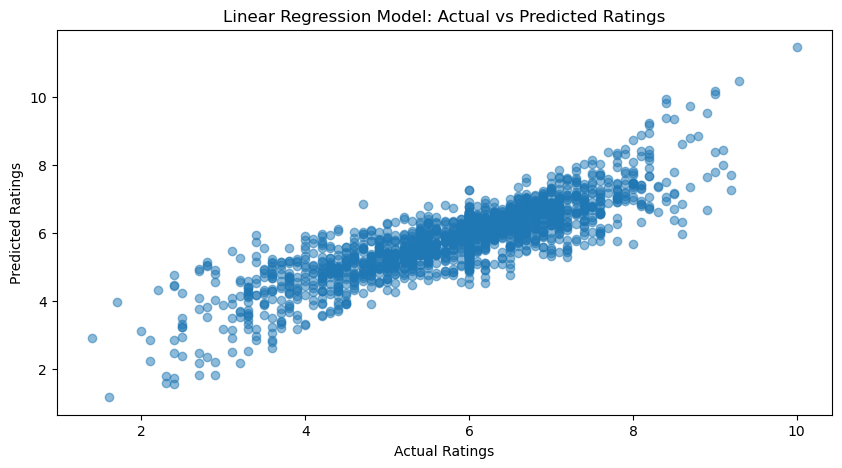

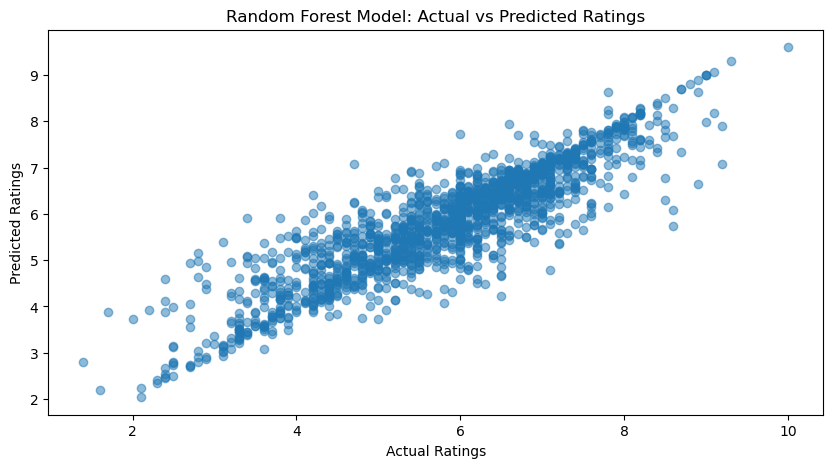

In [54]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.title('Linear Regression Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.title('Random Forest Model: Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

This scatter plot illustrates the results of a Linear Regression model comparing actual ratings to predicted ratings.

- **X-axis**: Represents the actual ratings provided by users.
- **Y-axis**: Represents the ratings predicted by the Linear Regression model.

Key observations:

- The points exhibit an upward trend, indicating that higher actual ratings are generally associated with higher predicted ratings.
- Compared to the Random Forest model, the points appear less tightly clustered, especially at the higher end, suggesting that the Linear Regression model may not capture some of the variability in the data as effectively.
- There is a noticeable spread in predicted ratings, particularly for actual ratings around 4 to 6, where many points are vertically aligned, indicating less accuracy in those ranges.

Overall, while the model shows a positive correlation, it also reflects some limitations in accurately predicting higher ratings.

This scatter plot shows the relationship between actual ratings and predicted ratings from a Random Forest model. 

- **X-axis**: Represents the actual ratings given.
- **Y-axis**: Represents the predicted ratings generated by the model.
- The points are scattered across the plot, generally rising from left to right, indicating that as the actual ratings increase, the predicted ratings also tend to increase.

Overall, the plot highlights how well the model estimates ratings, with many points clustering along an upward trend. However, there are some deviations, especially at the higher end of the ratings.

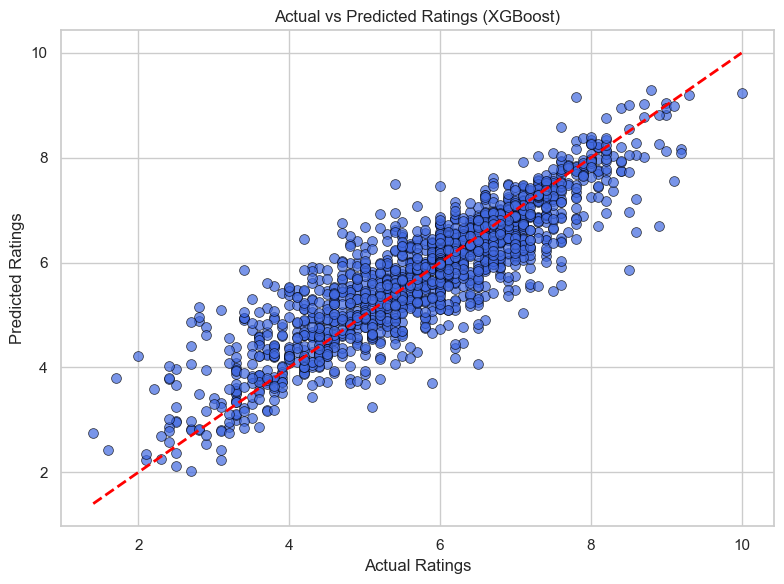

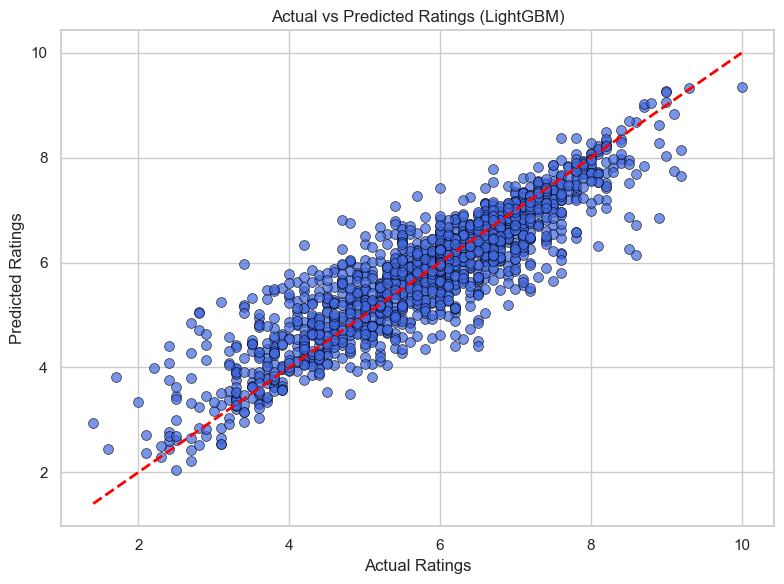

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Function to plot actual vs predicted
def plot_actual_vs_predicted(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, color='royalblue', s=50, edgecolor='black', alpha=0.7)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', lw=2, linestyle='--')
    plt.xlabel("Actual Ratings")
    plt.ylabel("Predicted Ratings")
    plt.title(f"Actual vs Predicted Ratings ({model_name})")
    plt.tight_layout()
    plt.show()

# Plot for XGBoost
plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost")

# Plot for LightGBM
plot_actual_vs_predicted(y_test, y_pred_lgbm, "LightGBM")


## Interpretation

The scatter plot illustrates the relationship between actual and predicted ratings generated by an XGBoost model. Here's a breakdown of its elements:

Axes:

The x-axis represents the actual ratings, ranging from 2 to 10.
The y-axis represents the predicted ratings, also ranging from 2 to 10.
Data Points:

Each blue dot corresponds to an individual observation, showing how well the predicted ratings align with the actual ratings. The density of points near the line indicates a good predictive performance.

The scatter plot presents the relationship between actual and predicted ratings from a LightGBM model. Here’s a detailed overview:

Axes:

The x-axis reflects the actual ratings, ranging from 2 to 10.
The y-axis displays the predicted ratings, also spanning from 2 to 10.
Data Points:

Each blue dot represents an individual observation, visualizing how closely predicted ratings match the actual ratings. The distribution of points suggests a generally positive correlation.

In summary, this plot demonstrates the effectiveness of the LightGBM model in accurately predicting ratings, with a noticeable correlation between actual and predicted values.

## THANK-YOU!!